# Miuul Data Analyst Bootcamp Final Project

***Credit Card Fraud Detection Dataset***

I will perform an exploratory data analysis to understand which features may be associated with fraudulent activities and then attempt to build models with these features and test their predictive efficacy.

In [59]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image
from sklearn.model_selection import GridSearchCV

# 1. OVERALL LOOK TO DATA
* I downloaded Credit Card Fraud Detection from Kaggle.
* First of all i have to share some information about my data that I selected from Kaggle.
* My data has 1.2M rows and 23 columns
* While I was undersampling the data to work on it, I kept the fraud datas same as in orginal data


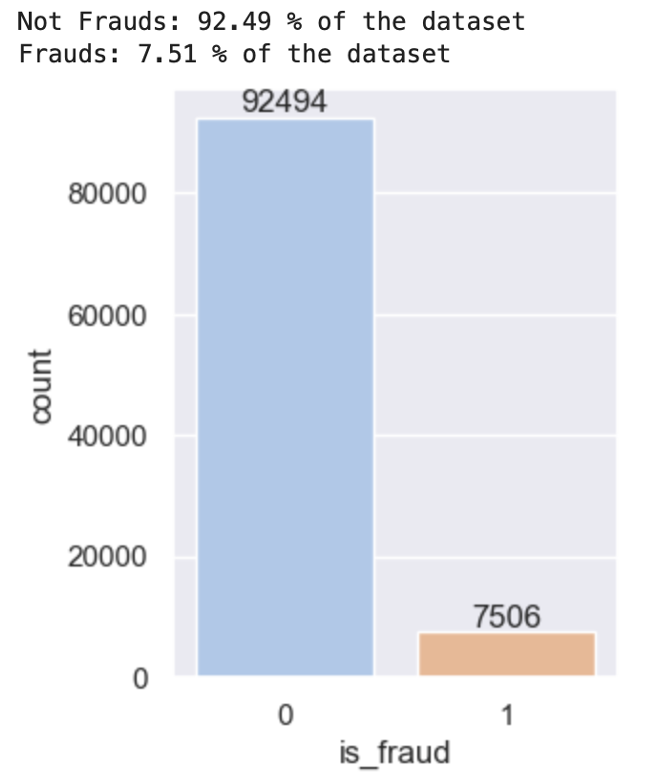

# 2. EDA With EXCEL,SQL and POWERBI
* Reviewed metadata in Excel. I made some inferences about the data for further analyses.
* Azure Data Studio was used to deepen the analyses. Basic SQL commands were used here.
* Within the scope of the project, after Excel and SQL, I started visualisation processes in PowerBI.

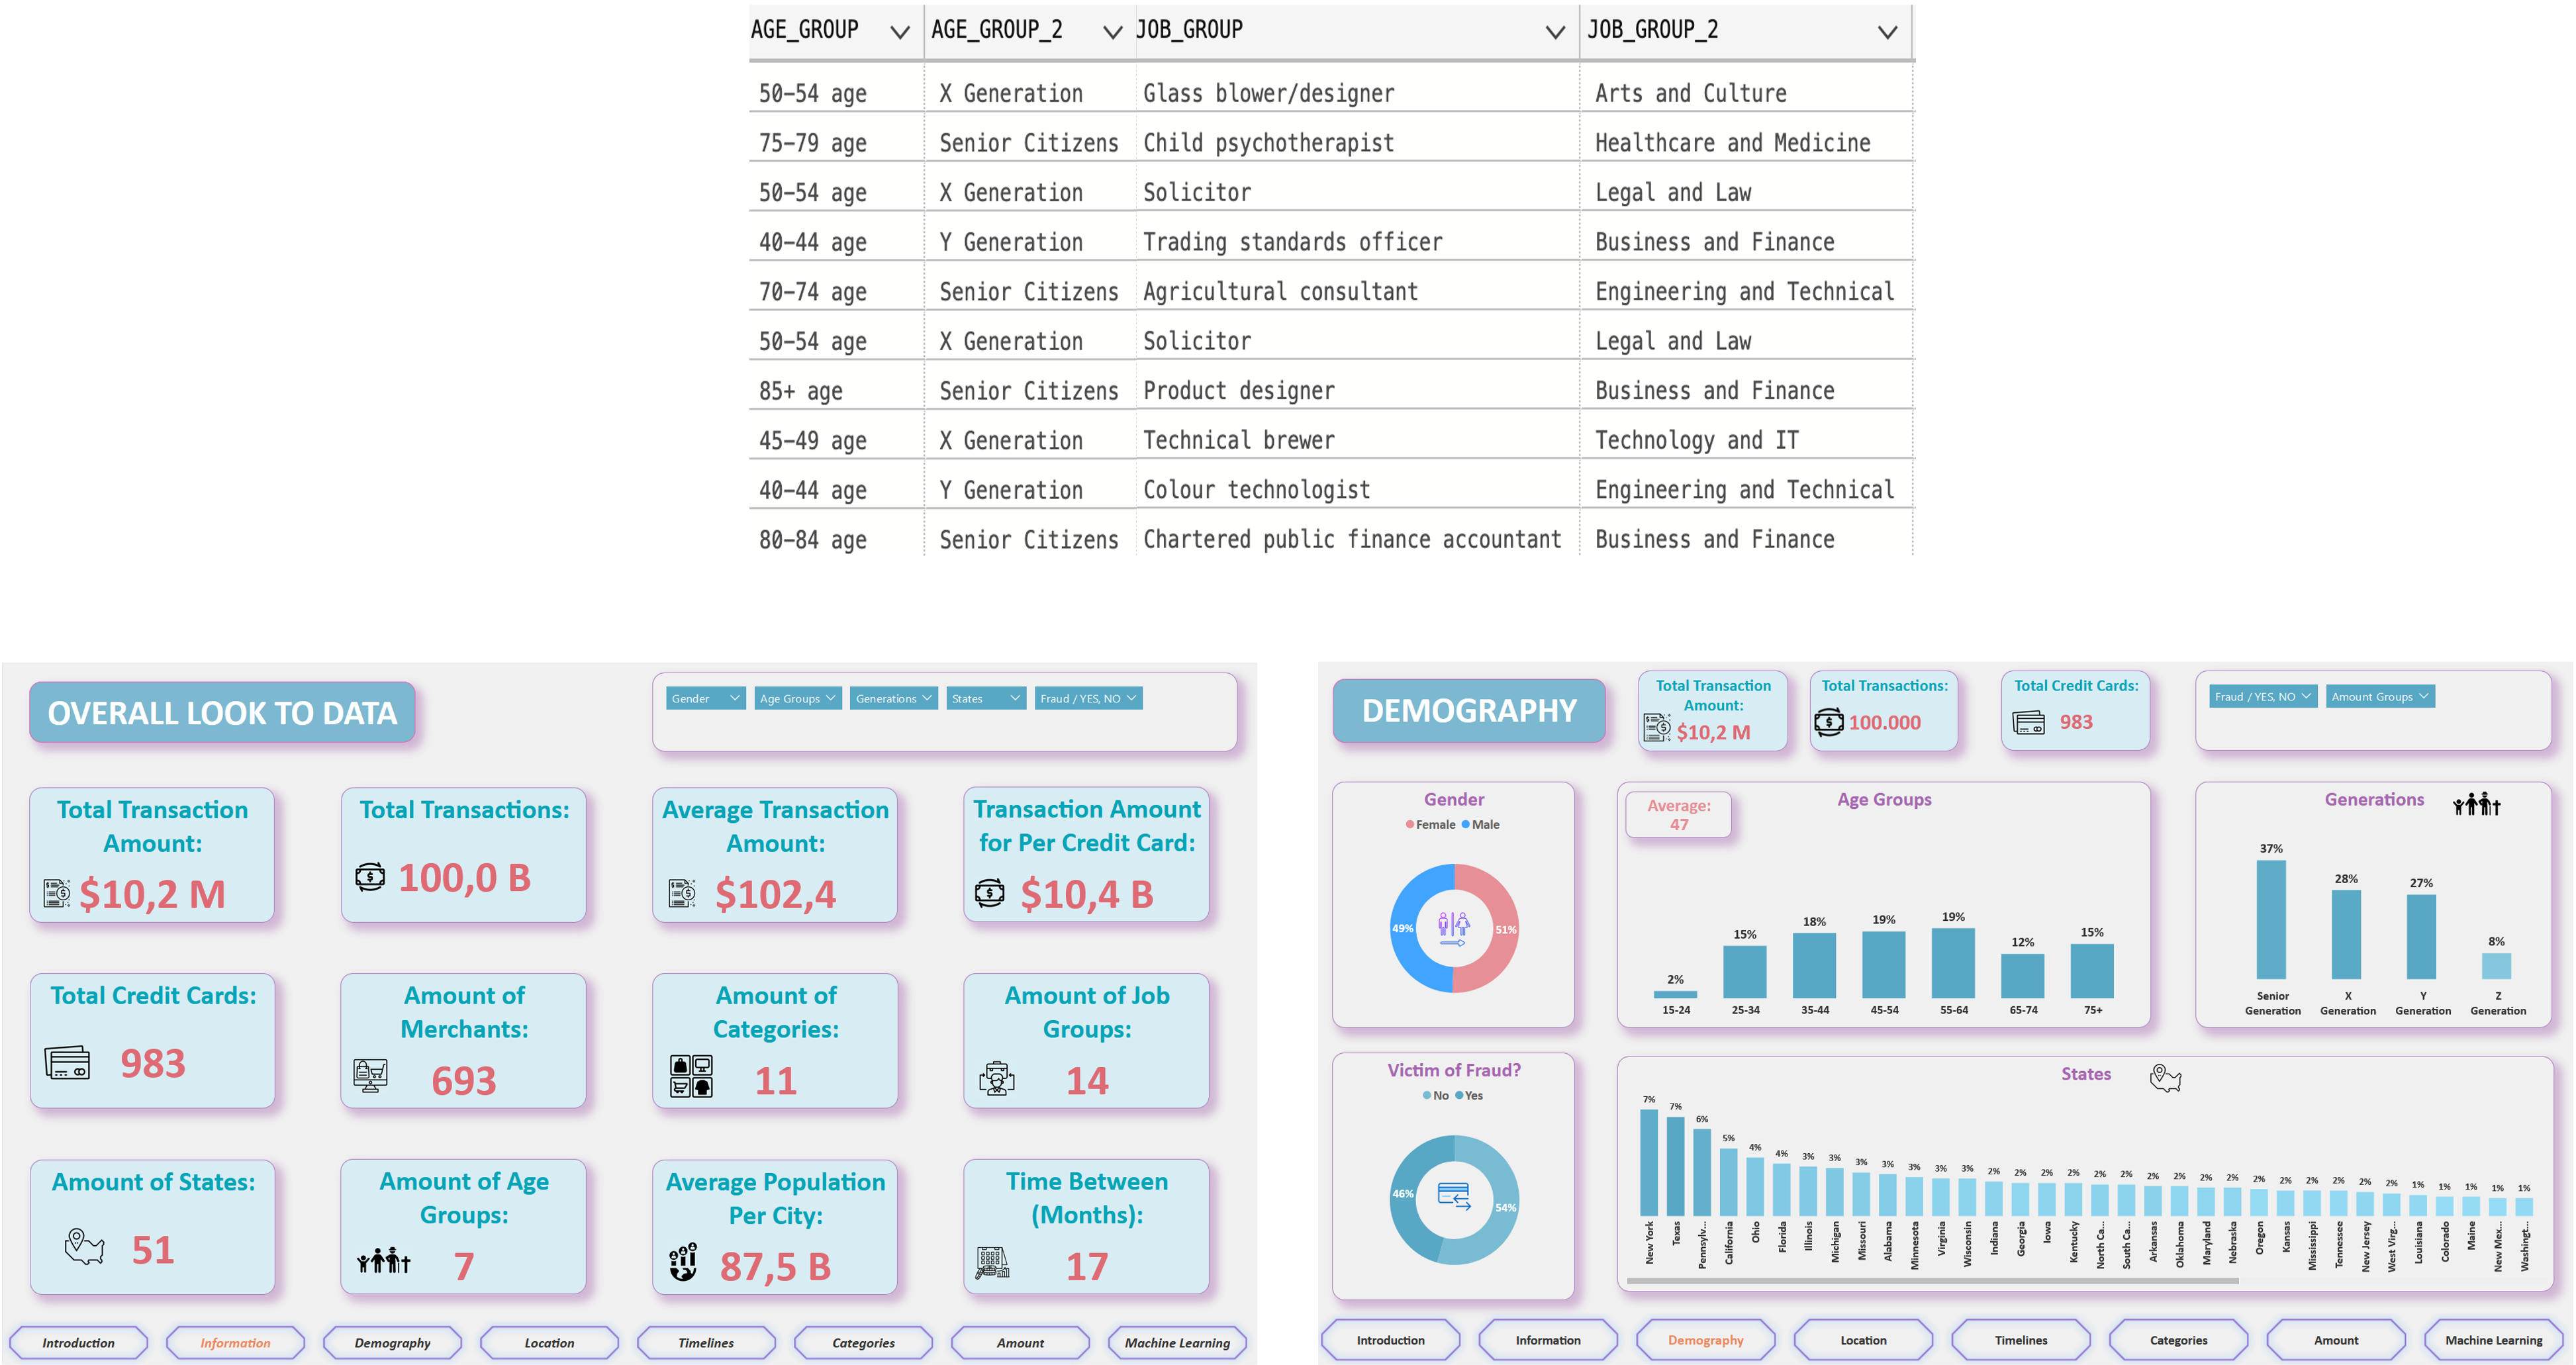


**Age Groups**
* I have found that people over 55 are more prone to fraud.

**States**
* I have found that states with a higher population distribution are more likely to be defrauded.

In [28]:
#Import Dataset
df= pd.read_excel('/kaggle/input/ham-data/Fraud_Ham_Data.xlsx') 


* I want the fraud rates to remain the same in the test and train data. The reason for this is that statistically I want to prevent the possibility that frauds will remain only in the test data. I also think it will affect the model performance.

In [29]:
#Split of df data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42,stratify=df['is_fraud'])


In [30]:
train_df.head(1)

ID  Unnamed: 0 trans_date_trans_time        cc_num  \
17633  17634      223250   2019-04-22 19:14:33  501899453424   

                            merchant   category     amt    first       last  \
17633  fraud_Lang, Towne and Schuppe  kids_pets  183.22  Jessica  Dominguez   

      gender  ...      lat     long city_pop                job         dob  \
17633      F  ...  33.9845 -85.9077    67082  Ceramics designer  1970-01-08   

                              trans_num   unix_time  merch_lat merch_long  \
17633  ce1e2f27da61e0af066eec9845479b59  1335122073  34.192032 -86.875878   

      is_fraud  
17633        0  

[1 rows x 24 columns]

In [31]:
test_df.head(1)

ID  Unnamed: 0 trans_date_trans_time            cc_num  \
30493  30494      392086   2019-06-28 19:23:09  4104312520615374   

                merchant category    amt   first       last gender  ...  \
30493  fraud_Pollich LLC     home  10.66  Brooke  Rodriguez      F  ...   

           lat      long city_pop               job         dob  \
30493  33.6401 -116.5567     1661  Therapist, music  1988-09-19   

                              trans_num   unix_time  merch_lat  merch_long  \
30493  1dfafcd4968f046a8bea44416ee66ac9  1340911389  33.393539 -117.516489   

      is_fraud  
30493        0  

[1 rows x 24 columns]

### 2.1 Data imbalance check

In [40]:
#Distribution of the train_df 
print('Normal:', round(train_df['is_fraud'].value_counts()[0]/len(train_df) * 100,2), '% of the dataset')
print('Frauds:', round(train_df['is_fraud'].value_counts()[1]/len(train_df) * 100,2), '% of the dataset')

Normal: 92.49 % of the dataset
Frauds: 7.51 % of the dataset


In [39]:
#Distribution of the test_df
print('Normal:', round(test_df['is_fraud'].value_counts()[0]/len(test_df) * 100,2), '% of the dataset')
print('Frauds:', round(test_df['is_fraud'].value_counts()[1]/len(test_df) * 100,2), '% of the dataset')

Normal: 92.5 % of the dataset
Frauds: 7.51 % of the dataset


In this dataset:

we have 92.49% of Normal transactions and only 7,51% (7506) of fraud transactions; which means that a blind guess (bet on Normal) would give us accuracy of 92.51%.

### 2.2 Data cleaning

In [42]:
#Check column type and Null of data
train_df.info(),test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 17633 to 27265
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     80000 non-null  int64  
 1   Unnamed: 0             80000 non-null  int64  
 2   trans_date_trans_time  80000 non-null  object 
 3   cc_num                 80000 non-null  int64  
 4   merchant               80000 non-null  object 
 5   category               80000 non-null  object 
 6   amt                    80000 non-null  float64
 7   first                  80000 non-null  object 
 8   last                   80000 non-null  object 
 9   gender                 80000 non-null  object 
 10  street                 80000 non-null  object 
 11  city                   80000 non-null  object 
 12  state                  80000 non-null  object 
 13  zip                    80000 non-null  int64  
 14  lat                    80000 non-null  float64
 15

(None, None)

#  3. Data Preprocessing and Data Visualization (Pythob and PowerBI)

### 3.1 Drop Columns

In [43]:
#Remove specified columns from the training data frame
drop_columns = ['Unnamed: 0','cc_num','merchant','trans_num','unix_time','first','last','street','zip']
train_df.drop(columns=drop_columns,inplace=True)
test_df.drop(columns=drop_columns,inplace=True)

In [44]:
train_df.shape
test_df.shape

(20000, 15)

### 3.2 Handle Date time

In [45]:
#Converting 'trans_date_trans_time' column to datetime format in dataframe
train_df['trans_date_trans_time']=pd.to_datetime(train_df['trans_date_trans_time'])

#taking only the date part from the 'trans_date_trans_time' column and converting it to '%Y-%m-%d' format
train_df['trans_date']=train_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')

# Convert 'trans_date' column to date format
train_df['trans_date']=pd.to_datetime(train_df['trans_date'])

#Convert the 'dob' (date of birth) column to date format
train_df['dob']=pd.to_datetime(train_df['dob'])

#Converting 'trans_date_trans_time' column to datetime format in dataframe
test_df['trans_date_trans_time']=pd.to_datetime(test_df['trans_date_trans_time'])

#taking only the date part from the 'trans_date_trans_time' column and converting it to '%Y-%m-%d' format
test_df['trans_date']=test_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')

# Convert 'trans_date' column to date format
test_df['trans_date']=pd.to_datetime(test_df['trans_date'])

#Convert the 'dob' (date of birth) column to date format
test_df['dob']=pd.to_datetime(test_df['dob'])

### 3.3 Feature Engineering

In [173]:
#Calculate Age
train_df["age"] = train_df["trans_date"]-train_df["dob"]
train_df["age"]=train_df["age"].astype('timedelta64[Y]')

test_df["age"] = test_df["trans_date"]-test_df["dob"]
test_df["age"]=test_df["age"].astype('timedelta64[Y]')

In [174]:
# Get Transaction Month & Year
train_df['trans_day'] = pd.DatetimeIndex(train_df['trans_date']).day
train_df['trans_month'] = pd.DatetimeIndex(train_df['trans_date']).month
train_df['trans_year'] = pd.DatetimeIndex(train_df['trans_date']).year

test_df['trans_day'] = pd.DatetimeIndex(test_df['trans_date']).day
test_df['trans_month'] = pd.DatetimeIndex(test_df['trans_date']).month
test_df['trans_year'] = pd.DatetimeIndex(test_df['trans_date']).year

In [175]:
#Calculate distance between merchant and home location
train_df['latitudinal_distance'] = abs(round(train_df['merch_lat']-train_df['lat'],3))
train_df['longitudinal_distance'] = abs(round(train_df['merch_long']-train_df['long'],3))

test_df['latitudinal_distance'] = abs(round(test_df['merch_lat']-test_df['lat'],3))
test_df['longitudinal_distance'] = abs(round(test_df['merch_long']-test_df['long'],3))

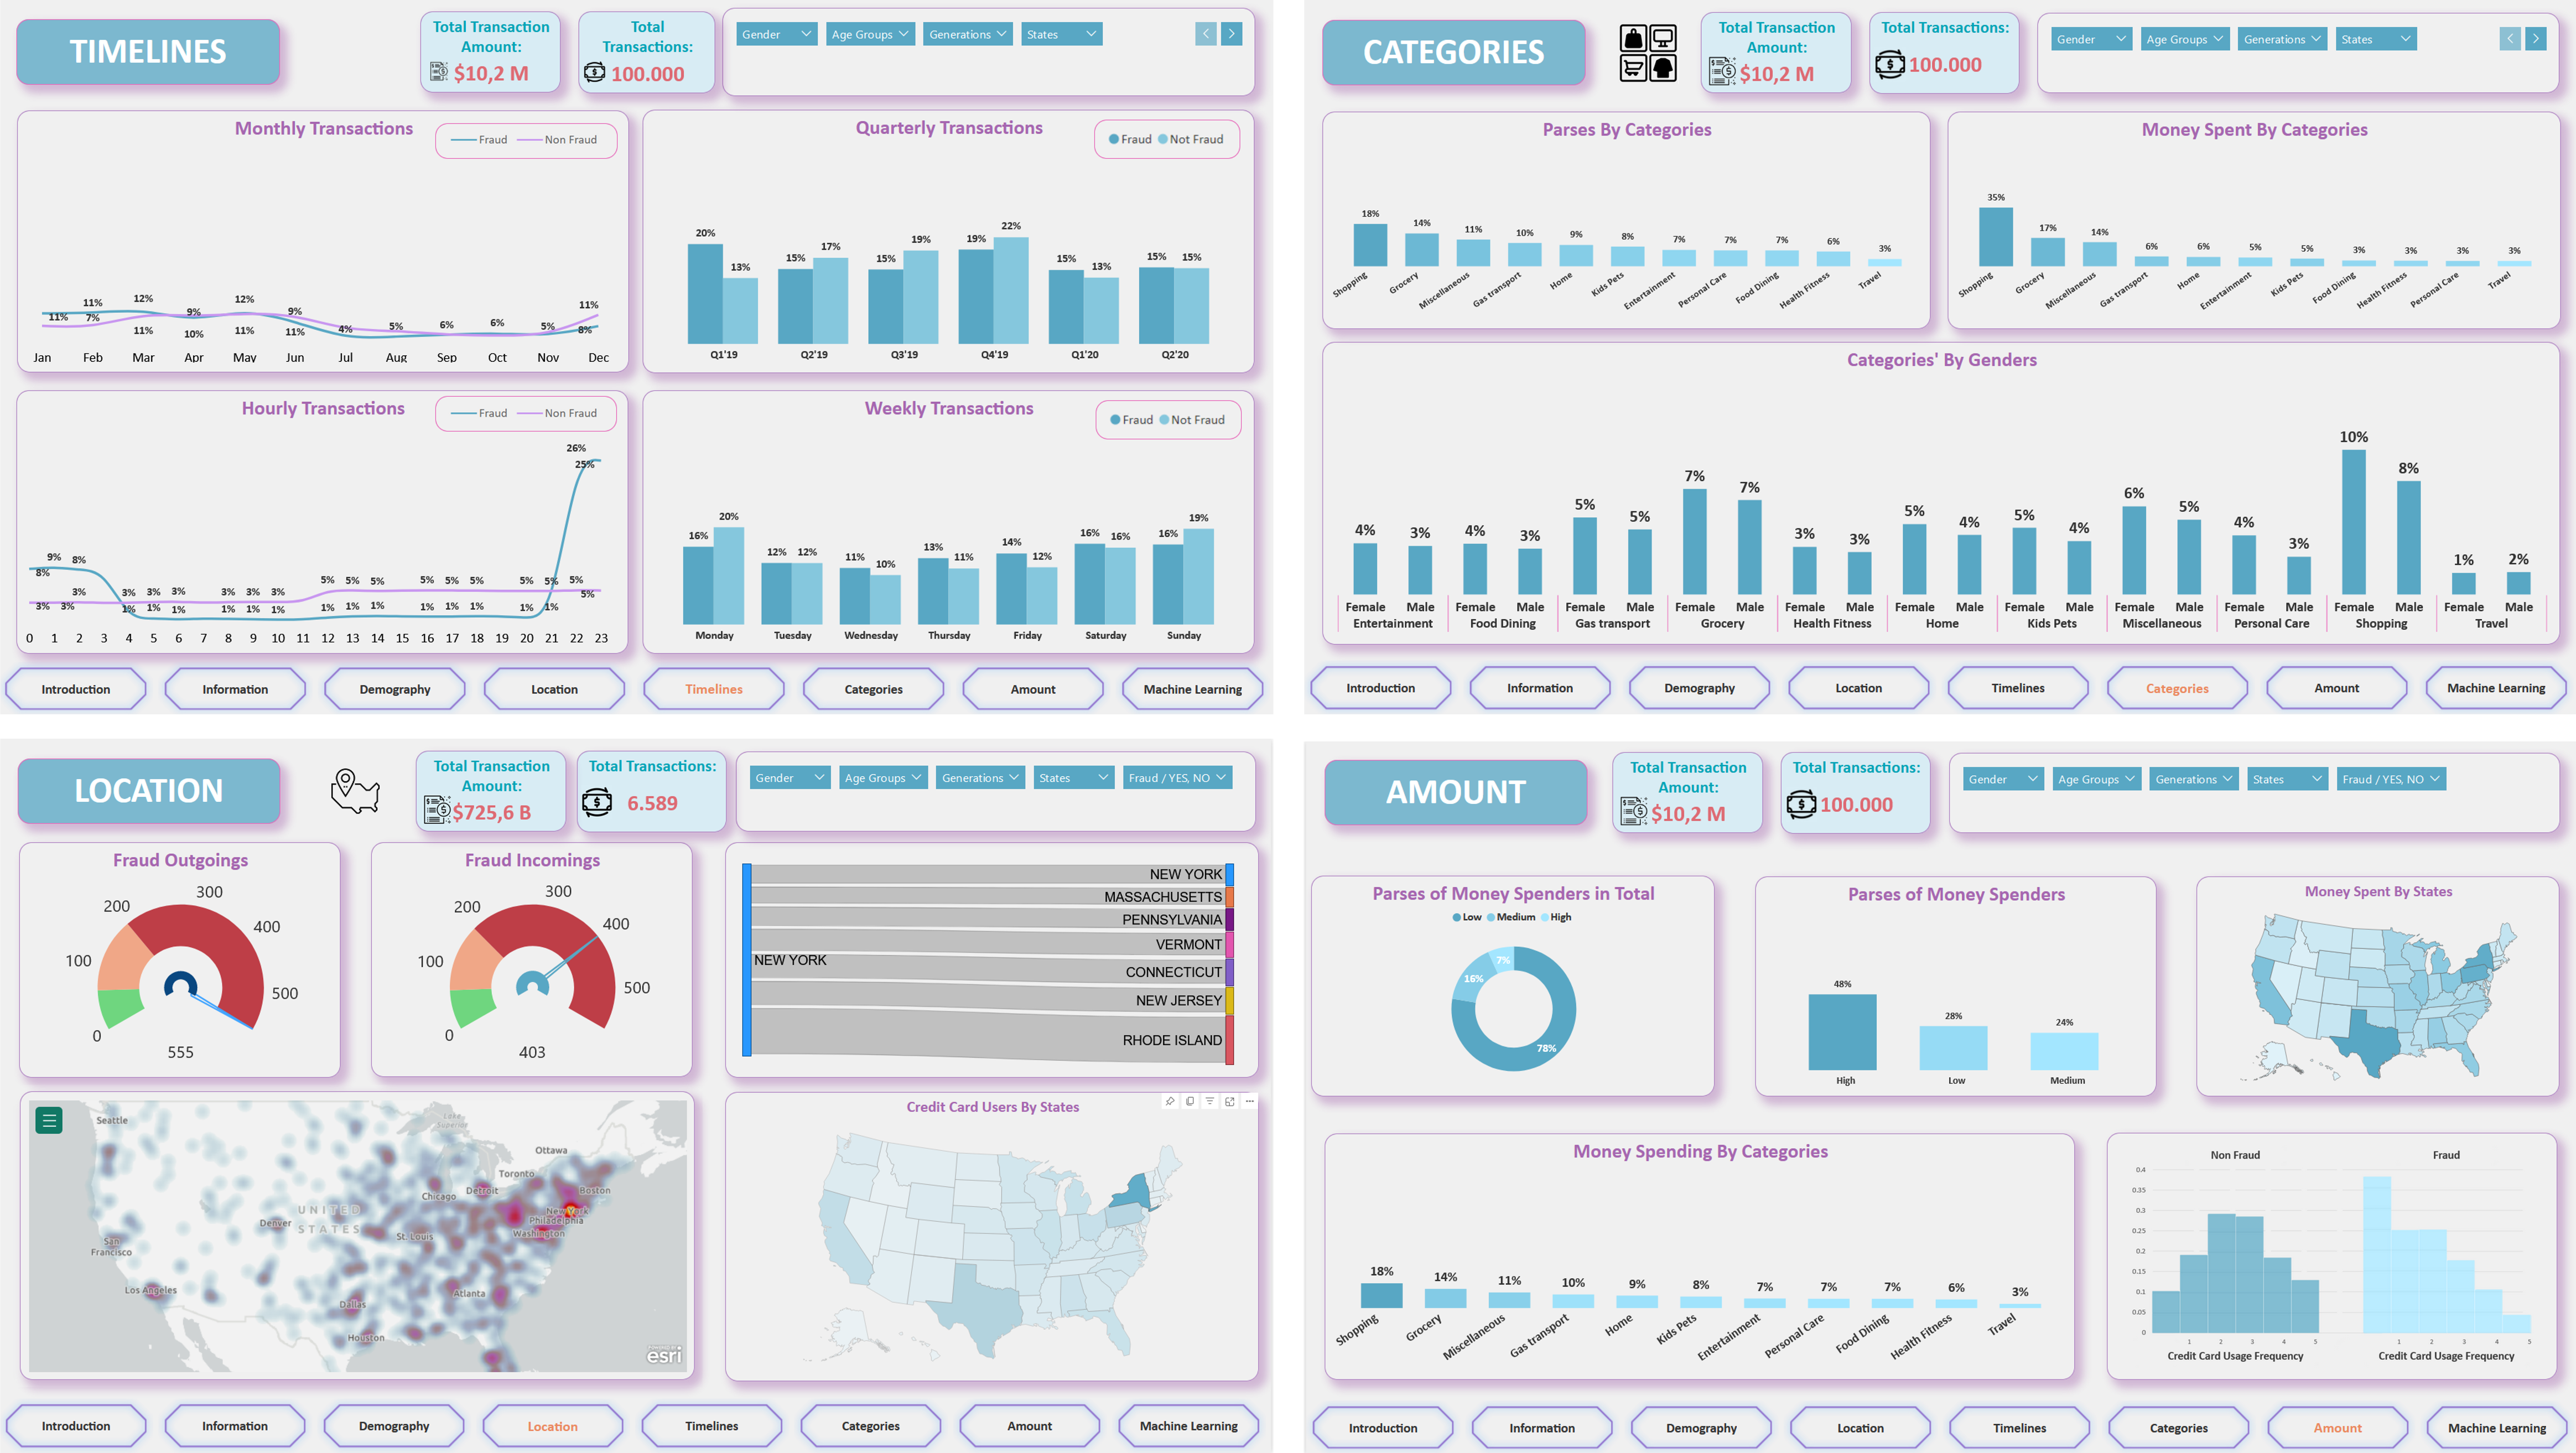


**Tımelines**
* When the graph is analysed, it is seen that fraud cases are more stable during daytime hours, but there is a significant increase between 22:00 - 03:00. This time interval draws attention as a period when fraudulent activities are intensified.
* This may indicate a period when security measures should be increased or specially monitored during these hours.

**Categories**
* Although there is no significant difference between shopping and other categories in terms of proportion, most of the money spent in the shopping category is in this category.

**Location**
* Pennsylvania is the state that generates the most fraudulent transactions and Tennessee is the state that attracts the most fraudulent transactions.

**Amount**
* The amount of fraud decreases according to the frequency of credit card use. 

In [47]:
#Drop Columns that are not relevant to predicy fraud transaction
drop_columns = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
train_df.drop(columns=drop_columns,inplace=True)
test_df.drop(columns=drop_columns,inplace=True)

In [48]:
# Convert categorical column gender into numerical 
train_df.gender=train_df.gender.apply(lambda x: 1 if x=="M" else 0)
test_df.gender=test_df.gender.apply(lambda x: 1 if x=="M" else 0)


In [49]:
#One Hot Encoding of Category column
train_df = pd.get_dummies(train_df, columns=['category'], prefix='category')
test_df = pd.get_dummies(test_df, columns=['category'], prefix='category')
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)


In [50]:
test_df.head()

ID     amt  gender  city_pop  is_fraud  category_entertainment  \
30493  30494   10.66       0      1661         0                       0   
52375  52376   43.42       1      4367         0                       0   
86963  86964    8.95       1      5211         0                       1   
11535  11536   11.78       0      2607         0                       0   
95973  95974  957.67       0      2523         0                       0   

       category_food_dining  category_gas_transport  category_grocery_net  \
30493                     0                       0                     0   
52375                     0                       0                     0   
86963                     0                       0                     0   
11535                     0                       0                     0   
95973                     0                       0                     0   

       category_grocery_pos  category_health_fitness  category_home  \
30493                     0                        0              1   
52375                     0                        1              0   
86963                     0                        0              0   
11535                     0                        0              0   
95973                     0                        0              0   

       category_kids_pets  category_misc_net  category_misc_pos  \
30493                   0                  0                  0   
52375                   0                  0                  0   
86963                   0                  0                  0   
11535                   0                  0                  0   
95973                   0                  0                  0   

       category_personal_care  category_shopping_net  category_shopping_pos  \
30493                       0                      0                      0   
52375                       0                      0                      0   
86963                       0                      0                      0   
11535                       0                      0                      1   
95973                       0                      0                      1   

       category_travel  
30493                0  
52375                0  
86963                0  
11535                0  
95973                0

### 3.4 Split Train and Test Data

* Extracts the 'is_fraud' and 'ID' columns from the train_df and test_df data frames.
* Create dependent and independent variables for training (X_train and y_train) and dependent and independent variables for testing (X_test and y_test).

In [57]:
X_train = train_df.drop(['is_fraud', 'ID'], axis=1)
y_train = train_df['is_fraud']

X_test = test_df.drop(['is_fraud', 'ID'], axis=1)
y_test = test_df['is_fraud']


### 3.5 Handle Data Imbalance

* SMOTE (Synthetic Minority Over-sampling Technique) is a technique often used when working with imbalanced datasets. Imbalanced datasets refer to situations where there is a significant imbalance between the number of samples in different classes. It is especially common in datasets with rare classes. SMOTE is used to correct this imbalance.

In [52]:
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
smote = SMOTE(random_state=42,)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

### 3.6 Standardize data

* Standard scaling transforms each feature (columns) in a dataset so that its mean value is 0 and its standard deviation is 1. This makes it easier to make direct comparisons between features when different features in the dataset have different ranges and can also improve the performance of some machine learning algorithms.

In [53]:
from sklearn.preprocessing import StandardScaler

# Step 1: Fit the StandardScaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Step 2: Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 4. Model Building

* The selected models below are known for their ability to perform well on datasets with sensitive and unbalanced classes, such as credit card fraud detection. They provide a reliable means of detecting fraud, providing efficient results in terms of both accuracy and computational cost. However, to determine which model is most appropriate, it is important to test them on a specific dataset and compare their performance.

### 4.1 Decision Tree

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     18499
           1       0.80      0.88      0.84      1501

    accuracy                           0.97     20000
   macro avg       0.90      0.93      0.91     20000
weighted avg       0.98      0.97      0.98     20000



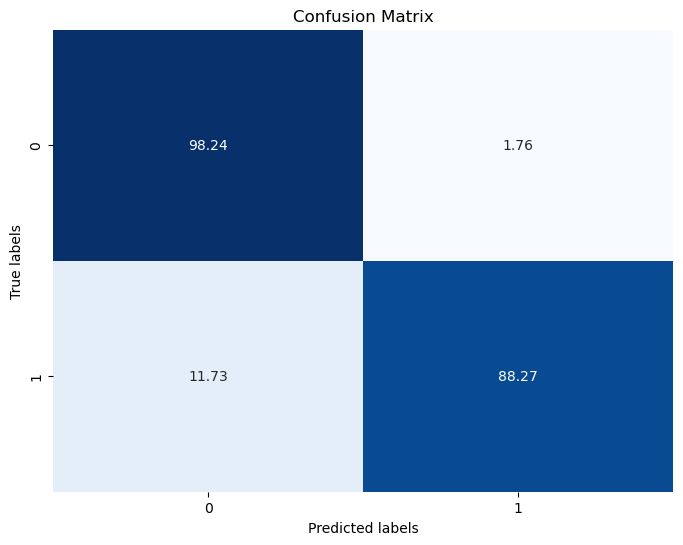

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize and fit the Decision Tree classifier on the training data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### 4.2 Random Forest

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18499
           1       0.86      0.90      0.88      1501

    accuracy                           0.98     20000
   macro avg       0.93      0.94      0.93     20000
weighted avg       0.98      0.98      0.98     20000



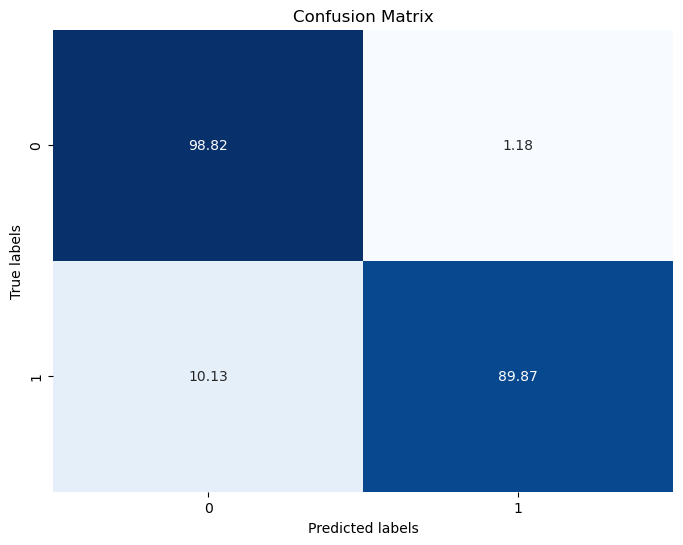

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the Random Forest classifier on the training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### 4.3 XGBoost

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18499
           1       0.94      0.83      0.88      1501

    accuracy                           0.98     20000
   macro avg       0.96      0.91      0.94     20000
weighted avg       0.98      0.98      0.98     20000



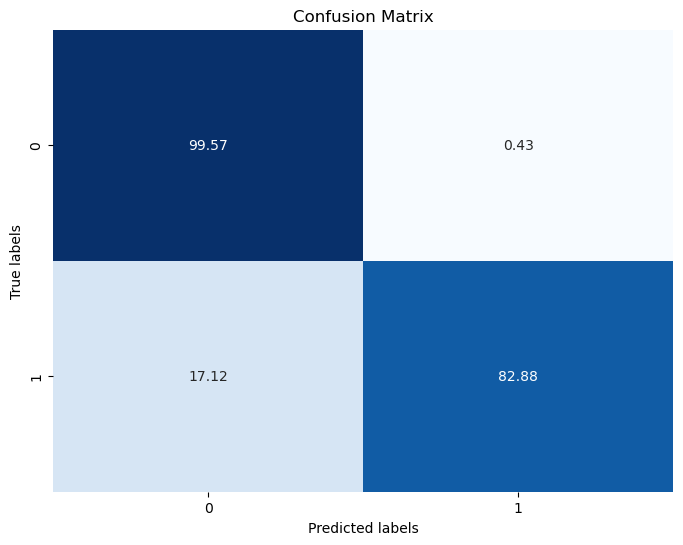

In [58]:
import xgboost as xgb

# Create an XGBoost classifier
clf = xgb.XGBClassifier(
    learning_rate=0.1,  # Learning rate (controls step size during training)
    n_estimators=100,   # Number of boosting rounds (trees)
    max_depth=3,        # Maximum tree depth
    objective='binary:logistic',  # Binary classification problem
    random_state=42
)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### 4.5 Machine Learning Presentation via PowerBI

!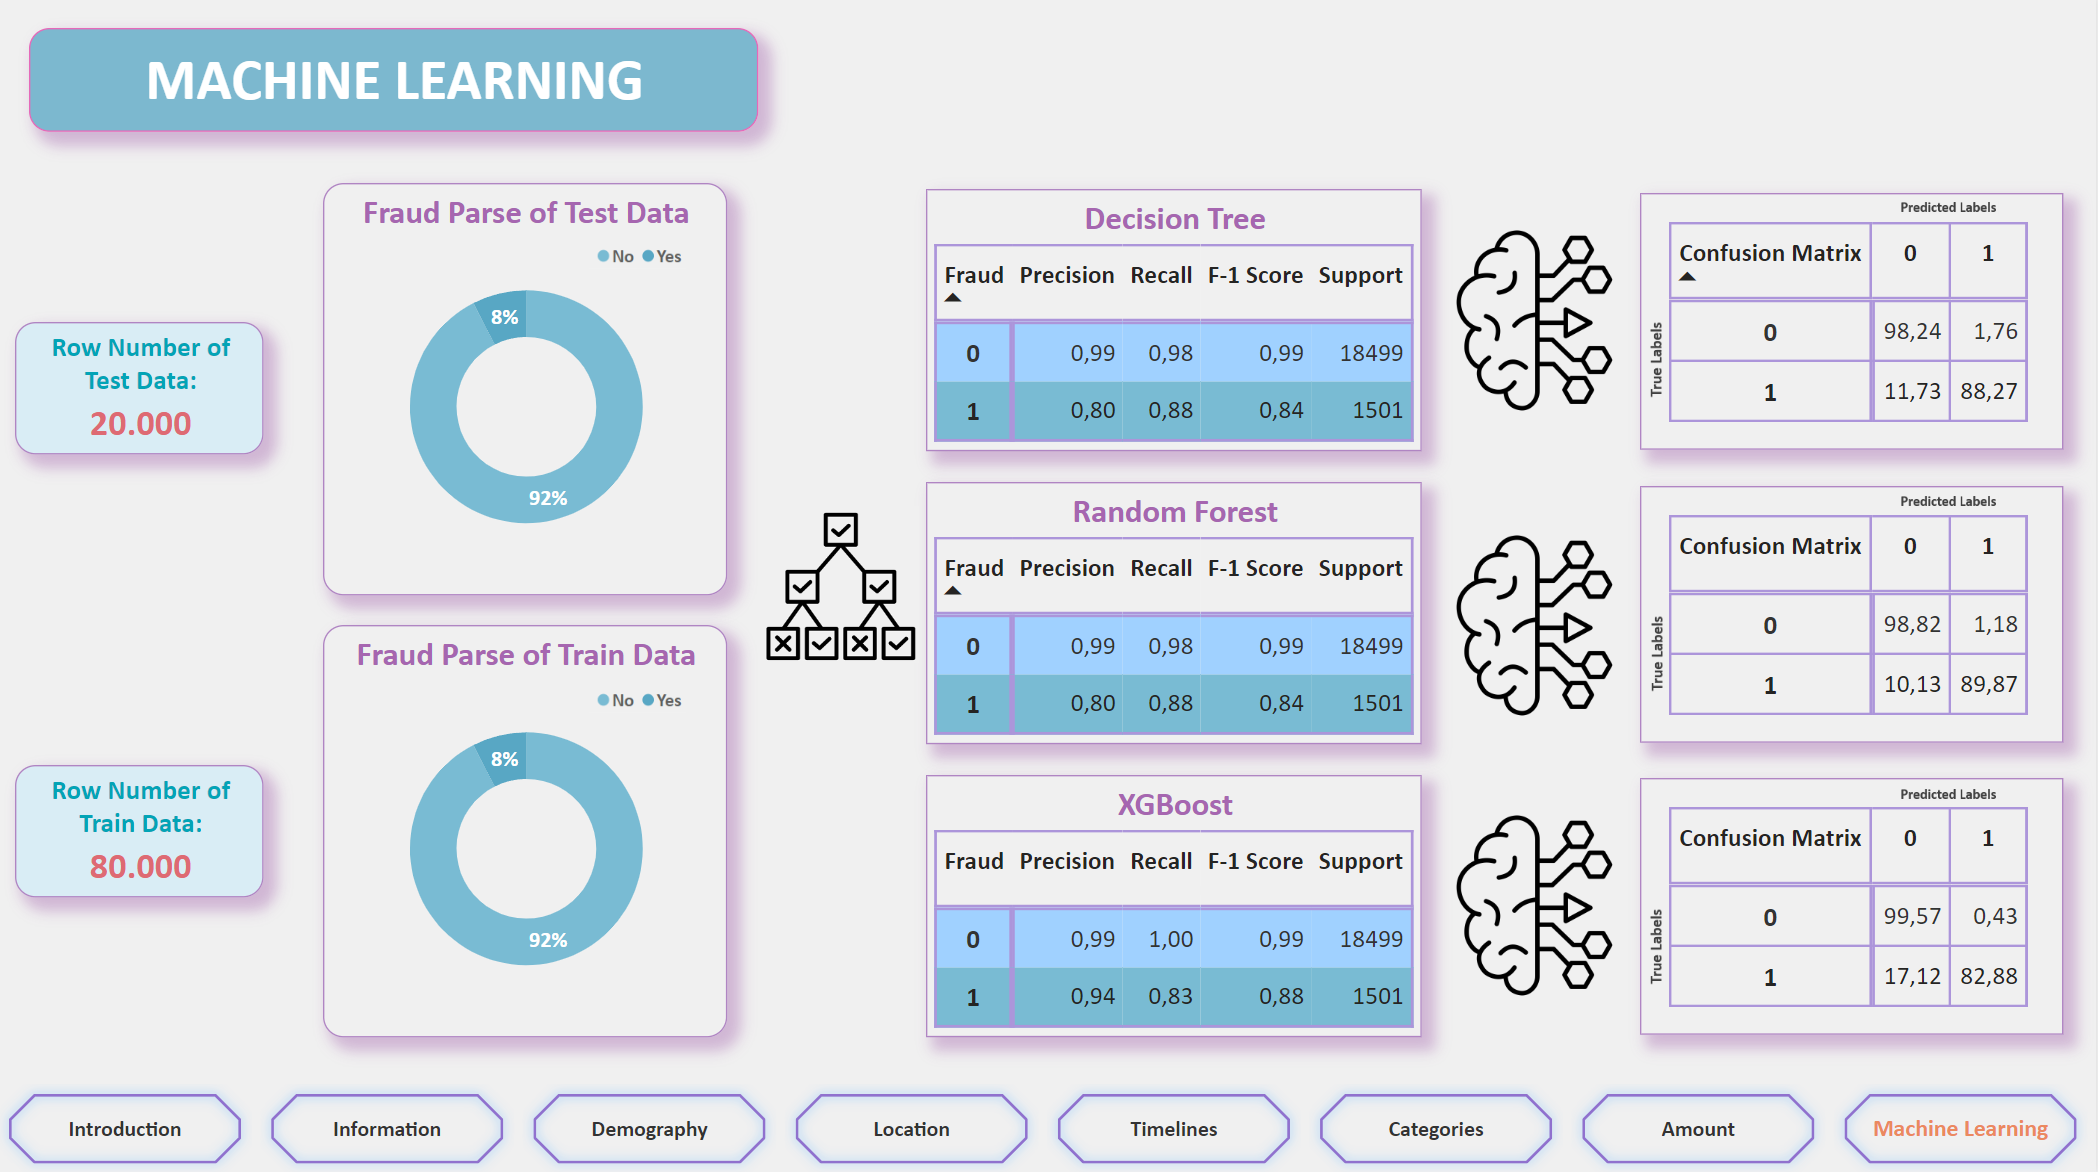

**Random Forest**
* Grid search and k fold in the hyperparameters in the random forest model increased the model performance.
* In the case of fraud detection, precision measures the probability that transactions predicted as fraudulent are actually fraudulent. In this case, the precision for the fraud class is 0.93 or 93%.

# 5. Conclusion

* Since random forest is a combination of multiple decision trees, it is generally resistant to overfitting. It is also resistant to outliers. It is important in cases such as fraud detection

* In order to evaluate its performance in real life, it is necessary to update the model with cross-validation, user feedback and new data and continuously monitor its performance. 

* In conclusion, the usability and performance of a model such as random forest in an important area such as fraud detection can be quite impressive. However, it is important to continuously monitor and update the model because fraud tactics may change and affect the effectiveness of the model.

